# Script to calculate the IC50 for metronidazole tested on WB, C6NR, C6aI and C60.5 on 12_9_19, first plate

In [2]:
#Import all needed modules
import pandas as pd
import numpy as np



In [3]:
#Read in data from excel file
WD = pd.read_excel("EC50MTZ_12_9_19_1.xlsx")
Data = WD[28:37]
Data

,Application: Tecan i-control,Unnamed: 1,Unnamed: 2,Unnamed: 3,"Tecan i-control , 1.10.4.0",Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
28,<>,1,2.0,3.0,4,5,6.0,7.0,8,9.0,10.0,11.0,12.0
29,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,B,NaN,24323.0,1034.0,21896,18077,15495.0,36462.0,22864,15788.0,2207.0,2607.0,NaN
31,C,NaN,26089.0,29118.0,1171,17488,26767.0,20000.0,23824,18205.0,20951.0,7431.0,NaN
32,D,NaN,27013.0,31148.0,21497,1173,5527.0,48527.0,22263,14672.0,31742.0,38765.0,NaN
33,E,NaN,26837.0,38747.0,24171,18179,1194.0,38811.0,28983,16780.0,33915.0,23008.0,NaN
34,F,NaN,28554.0,36075.0,26308,17159,21708.0,8147.0,29529,11159.0,1469.0,1632.0,NaN
35,G,NaN,27080.0,35688.0,23795,20779,28911.0,37884.0,30589,20432.0,8693.0,3219.0,NaN
36,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Before I can define the names I need to distract the background signal from the solutions used

Background = (Data.iloc[2,3]+Data.iloc[3,4]+Data.iloc[4,5]+Data.iloc[5,6])/4

In [5]:
#That Background signal is distracted from all cells.
Data_nB = Data.iloc[1:9,1:13]
Data_nB -= Background
Data_nB

,Unnamed: 1,Unnamed: 2,Unnamed: 3,"Tecan i-control , 1.10.4.0",Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,23180.0,-109.0,20753,16934,14352.0,35319.0,21721,14645.0,1064.0,1464.0,NaN
31,NaN,24946.0,27975.0,28,16345,25624.0,18857.0,22681,17062.0,19808.0,6288.0,NaN
32,NaN,25870.0,30005.0,20354,30,4384.0,47384.0,21120,13529.0,30599.0,37622.0,NaN
33,NaN,25694.0,37604.0,23028,17036,51.0,37668.0,27840,15637.0,32772.0,21865.0,NaN
34,NaN,27411.0,34932.0,25165,16016,20565.0,7004.0,28386,10016.0,326.0,489.0,NaN
35,NaN,25937.0,34545.0,22652,19636,27768.0,36741.0,29446,19289.0,7550.0,2076.0,NaN
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#This code does the first step; assigning the letter and number combinations to their identifiers on the plate

#Having some problem to move it to a module because it than only is assigned locally.
#I will leave this for now and accept it as is. This is definetely clearer for the user and this step
#will always be the same.

A1,B1,C1,D1,E1,F1,G1,H1 = Data_nB.iloc[0:8,0]   #This corresponds to the first Data_nB column
A2,B2,C2,D2,E2,F2,G2,H2 = Data_nB.iloc[0:8,1]   #This corresponds to the second Data_nB column
A3,B3,C3,D3,E3,F3,G3,H3 = Data_nB.iloc[0:8,2]   #etc
A4,B4,C4,D4,E4,F4,G4,H4 = Data_nB.iloc[0:8,3]  
A5,B5,C5,D5,E5,F5,G5,H5 = Data_nB.iloc[0:8,4]
A6,B6,C6,D6,E6,F6,G6,H6 = Data_nB.iloc[0:8,5]
A7,B7,C7,D7,E7,F7,G7,H7 = Data_nB.iloc[0:8,6]
A8,B8,C8,D8,E8,F8,G8,H8 = Data_nB.iloc[0:8,7]
A9,B9,C9,D9,E9,F9,G9,H9 = Data_nB.iloc[0:8,8]
A10,B10,C10,D10,E10,F10,G10,H10 = Data_nB.iloc[0:8,9]
A11,B11,C11,D11,E11,F11,G11,H11 = Data_nB.iloc[0:8,10]
A12,B12,C12,D12,E12,F12,G12,H12 = Data_nB.iloc[0:8,11]


#Update: Found out that pandas can do similar indexing already. I tried it and while I can call
#A1 as Df_i.loc["A","""1"""], that does not really make it that much simpler.

In [7]:
#Next step can either be to ask the user to put in for every field which combination of concentration and 
#strain they have or to create masks were one for example only fills in strain 1 = xx and gets the standard
#set-up filled in automatically.

#I should make them as placeholders a la S1_C1
#Than give a mask were you input S1 = WB and it replaces all, as well as C1 = 0uM and replaces all
#Now I need to take one element at a time and assign one cell to it
#Make different masks in the module where M1 corresponds to my standard set-up but you can also just type it from 
#hand or create your own.
#For now I implement it as below; this already eases alot because now you can just read straight from the template
#where you loaded which sample and mock and use those to calculate.

In [8]:
#Survival rates for strain one at all concentrations. Always take the field with drug (+-field in template)
#and divide by the mock field. Than make a list of them, the first element serves as 1 (=100%).
#The Strain0 value serve as a starting point to see whether any values are higher -> pippeting error
#Come back to these values to doublecheck for calculations of >100% in the table below.
#The number given in the name is the concentration in µM.
WB0 = (B2+F6)/2
WB1 = D2/C2
WB2 = F2/E2
WB5 = B6/G2
WB10 = D6/C6
WB20 = B10/G6
WB50 = F10/D10
WB = [1, WB1, WB2, WB5, WB10, WB20, WB50]
WB0

21872.5

In [9]:
#Strain 2
C6NR0 = (C3+D7)/2
C6NR1 = E3/D3
C6NR2 = G3/F3
C6NR5 = C7/B7
C6NR10 = F7/E7
C6NR20 = B11/G7
C6NR50 = F11/D11
C6NR = [1, C6NR1, C6NR2, C6NR5, C6NR10, C6NR20, C6NR50]
C6NR0

37679.5

In [10]:
#Strain 3
C6050 = (B4+D8)/2
C6051 = E4/D4
C6052 = G4/F4
C6055 = C8/B8
C60510 = F8/E8
C60520 = C10/G8
C60550 = G10/E10
C605 = [1, C6051, C6052, C6055, C60510, C60520, C60550]
C6050

20936.5

In [11]:
#Strain 4
C6aI0 = (B5+D9)/2
C6aI1 = E5/C5
C6aI2 = G5/F5
C6aI5 = C9/B9
C6aI10 = F9/E9
C6aI20 = C11/G9
C6aI50 = G11/E11
C6aI = [1, C6aI1, C6aI2, C6aI5, C6aI10, C6aI20, C6aI50]
C6aI0

15231.5

In [12]:
# Make a list of concentrations to be included for plotting. All divided by 100 to not run into problems in next step.
Conc = [1e-22, 0.01, 0.02, 0.05, 0.10, 0.20, 0.50]

In [13]:
# Now lets make this into an array. Than transpose it and multiply by 100 to achieve procent.
MTZ_1 = pd.DataFrame([Conc, WB, C6NR, C605, C6aI] )
MTZ_1 = MTZ_1.T*100

#Set column names
MTZ_1.columns = ['Conc', 'WB', 'C6NR', 'C605', 'C6aI']
print(MTZ_1)

#Warning that below wels are adjusted in which the cells grew slower om just DMSO than with drug. 
#Those are assumed to be 100% since the drug had no clear influence here. 
#Make sure to double check the values comparing the first and second table
import warnings
warnings.warn("Warning: Values above 100% are set to 100%!")


# Adjusting for wells in which the mock grew slower than the cells with drug. 
a = MTZ_1[:]>100
MTZ_1[a] = 100
MTZ_1

           Conc          WB        C6NR        C605        C6aI
0  1.000000e-20  100.000000  100.000000  100.000000  100.000000
1  1.000000e+00  103.704001  125.325779  113.137467  104.227593
2  2.000000e+00  106.682494   98.892133   90.013908  122.602398
3  5.000000e+00   55.334079   53.390526  104.419686  116.503926
4  1.000000e+01   17.108960   18.594032  101.961207   64.053207
5  2.000000e+01    3.831749    3.984649   67.268899   32.598891
6  5.000000e+01    1.065394    1.299771   23.037959    9.494626


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Warning: Values above 100% are set to 100%!
  del sys.path[0]


,Conc,WB,C6NR,C605,C6aI
0,1.000000e-20,100.000000,100.000000,100.000000,100.000000
1,1.000000e+00,100.000000,100.000000,100.000000,100.000000
2,2.000000e+00,100.000000,98.892133,90.013908,100.000000
3,5.000000e+00,55.334079,53.390526,100.000000,100.000000
4,1.000000e+01,17.108960,18.594032,100.000000,64.053207
5,2.000000e+01,3.831749,3.984649,67.268899,32.598891
6,5.000000e+01,1.065394,1.299771,23.037959,9.494626


<function matplotlib.pyplot.show(*args, **kw)>

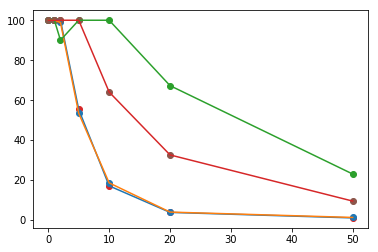

In [14]:
import matplotlib.pyplot as plt

x = np.array(MTZ_1["Conc"])
y = np.array(MTZ_1["WB"])
a = np.array(MTZ_1["C6NR"])
b = np.array(MTZ_1["C605"])
c = np.array(MTZ_1["C6aI"])



plt.plot(x, y, 'o', color='tab:red')
plt.plot(x, a, 'o', color='tab:blue')
plt.plot(x, b, 'o', color='tab:green')
plt.plot(x, c, 'o', color='tab:brown')
plt.plot(x,y)
plt.plot(x,a)
plt.plot(x,b)
plt.plot(x,c)


plt.show

In [16]:
#I gave up curve fitting for now since I could not find a satisfactory solution how to implement that. 
#hope to pick it up again once I trasnlated the whole script.

In [ ]:
#I instead went for a logarithmic y scale approach, since that works mostly well
#I could even try out some package to get me to the IC50. Will do that further down.
#Here the question now is whether I should just implement the same as in the other script or whether I should try to 
#go for a more automated approach. Like can I select all from and including the last 100% to all and including the 
# second below 50%(if there are two)? Cause that should about cover all I need for establishing the IC50

<function matplotlib.pyplot.show(*args, **kw)>

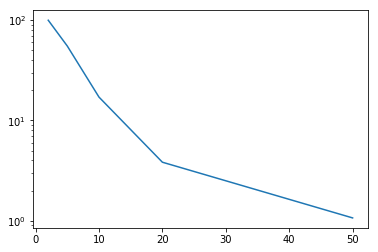

In [56]:
#In this part I automate the selection of the linear part of the curve when looked at in logarithmic scale
#The first step is to select all points from and including the last point that is 100%
#For this I create two new data frames per strain
WB_a  = MTZ_1["WB"]   
Conc_WB = MTZ_1["Conc"]
#I filter for all that are smaller than 99%
WB_aH = WB_a <99
#and ask for the length of that element
WB_aH = WB_a[WB_aH]
len(WB_aH)


#In the last step I give the total length minus the length of that element plus the data point exactly before to catch
#the last point of 100%
#Now I should find a way of calculating the last step before the curve flattens to make this complete
WB_x = Conc_WB[(7-(len(WB_aH)+1)):7]
WB_y = WB_a[(7-(len(WB_aH)+1)):7]

fig, ax = plt.subplots()
ax.set_yscale('log')
plt.plot(WB_x,WB_y)
plt.show

ValueError: too many values to unpack (expected 3)

<function matplotlib.pyplot.show(*args, **kw)>

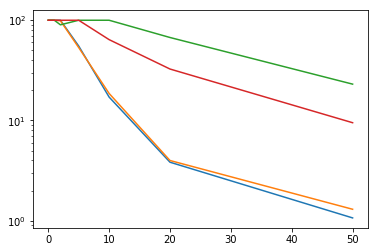

In [18]:

fig, ax = plt.subplots()
ax.set_yscale('log')
plt.plot(x,y)
plt.plot(x,a)
plt.plot(x,b)
plt.plot(x,c)
plt.show

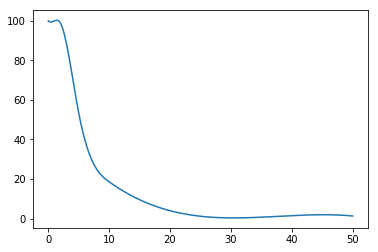

In [212]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

x = np.array(MTZ_1["Conc"])
y = np.array(MTZ_1["C6NR"])


# 300 represents number of points to make between T.min and T.max
xnew = np.linspace(x.min(), x.max(), 300) 

spl = make_interp_spline(x, y, k=3)  # type: BSpline
y_smooth = spl(xnew)

plt.plot(xnew, y_smooth)
plt.show()

# Can I get the function here and it is at all usable? Check it out later. However cannot work since 
# in real world the cells cannot survive better at higher C

#plt.plot(x,y)
#plt.show

In [20]:




fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:brown')

0    100.000000
1    100.000000
2    100.000000
3     55.334079
4     17.108960
5      3.831749
6      1.065394
Name: WB, dtype: float64

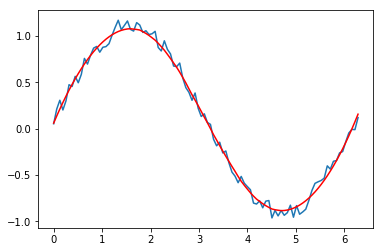